In [61]:
#Dependencies and setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [62]:
#Import data
file = Path("../Resources/clean3data.csv")
df=pd.read_csv(file)
df.head()

,Unnamed: 0,Year,Country Name,International Tourism Expenditures (US$),International Tourism Receipts (US$),# of arrivals,GDP (US$),Total Population
0,652,2019,Albania,1852000000,2458000000,6406000,15401826080,2854191
1,218,2017,Albania,1473000000,2050000000,5118000,13019726211,2873457
2,869,2020,Albania,805000000,1243000000,2658000,15162734205,2837849
3,435,2018,Albania,1750000000,2306000000,5927000,15156424061,2866376
4,1,2016,Albania,1338000000,1821000000,4736000,11861199830,2876101


In [63]:
df_filtered = df[(df["Year"]>= 2018) & (df["Year"]<= 2018)]
df_filtered.head()

,Unnamed: 0,Year,Country Name,International Tourism Expenditures (US$),International Tourism Receipts (US$),# of arrivals,GDP (US$),Total Population
3,435,2018,Albania,1750000000,2306000000,5927000,15156424061,2866376
8,436,2018,Algeria,542000000,196500000,2657000,174910891124,41927007
12,439,2018,Angola,762000000,557000000,218000,77792944471,31273533
16,440,2018,Antigua and Barbuda,111000000,854000000,1064000,1604770370,91626
21,441,2018,Argentina,13084000000,5999000000,6942000,524819898586,44494502


In [64]:
#Clean the data 
clean_df1 = df_filtered.drop(["Unnamed: 0"], axis=1)
clean_df1

clean_df = clean_df1.sort_values(["Country Name"], ascending = True)
clean_df.head()

,Year,Country Name,International Tourism Expenditures (US$),International Tourism Receipts (US$),# of arrivals,GDP (US$),Total Population
3,2018,Albania,1750000000,2306000000,5927000,15156424061,2866376
8,2018,Algeria,542000000,196500000,2657000,174910891124,41927007
12,2018,Angola,762000000,557000000,218000,77792944471,31273533
16,2018,Antigua and Barbuda,111000000,854000000,1064000,1604770370,91626
21,2018,Argentina,13084000000,5999000000,6942000,524819898586,44494502


In [65]:
def corfunction(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regressval = x * slope + intercept 
    plt.scatter(x,y,marker ="o",facecolors = "blue",edgecolors = "black")
    plt.plot(x,regressval,"r-")
    plt.annotate(equation,(5.8,0.8),fontsize=15,color="red")
    plt.grid
    labelx = abelx
    xlabel = labelx
    labely = abely
    ylabel = labely
    title1 = title2
    title = title1
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue}")
    plt.show
    return 

In [66]:
#Question 1 What Countries attract the most tourists?

In [67]:
#Find the Country that attracts the most tourists
inbound_tourist_df = clean_df[['Country Name','# of arrivals']]
inbound_tourist_df

inbound_df = inbound_tourist_df.sort_values(["# of arrivals"], ascending = False)
inbound_df.head(10)

inbound_df2 = inbound_df.head(10)
inbound_df2

,Country Name,# of arrivals
223,France,211998000
635,United States,169324921
382,Mexico,96497000
299,Italy,93228601
478,Poland,85946000
269,"Hong Kong SAR, China",65148000
163,Croatia,57668000
271,Hungary,57667000
614,Turkiye,46113000
240,Germany,38881000


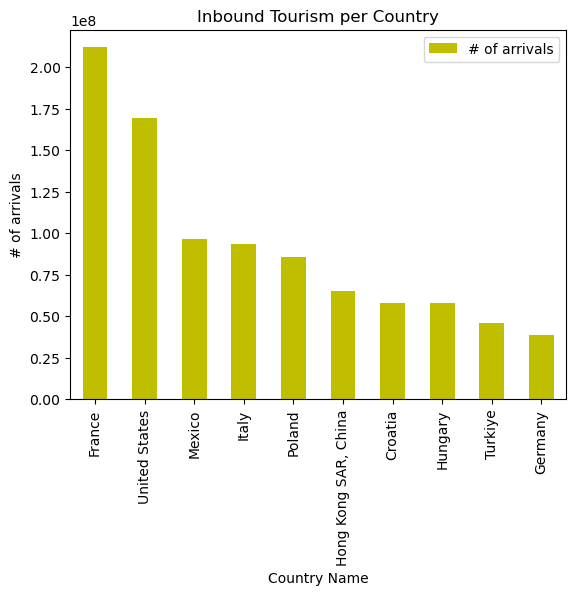

In [68]:
#Create a bar graph

plot_pandas = inbound_df2.set_index(['Country Name']).plot.bar(color = 'y')

#Set labels
plt.xlabel('Country Name')
plt.ylabel('# of arrivals')
plt.title('Inbound Tourism per Country')
plt.savefig("../png/2018bar1.png")
plt.show()

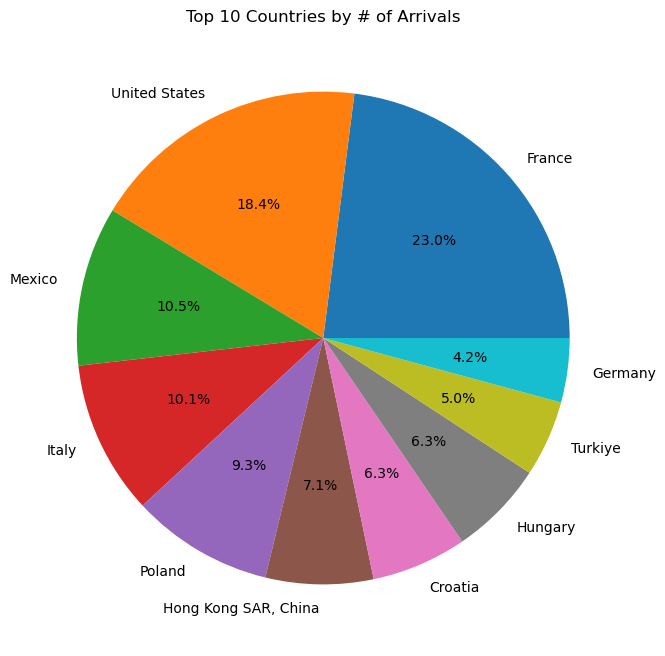

In [69]:
count = inbound_df2['# of arrivals']
labels = inbound_df2['Country Name']
plt.figure(figsize=(8, 8))
plt.pie(count, labels=labels, autopct= "%1.1f%%")
plt.title('Top 10 Countries by # of Arrivals')
plt.savefig("../png/2018pie1.png")
plt.show()

In [70]:
### Question 2 What countries have the highest International Tourism Receipts?

In [71]:
#Find the countries with top tourism receipts
tourism1_df = clean_df[['Country Name', 'International Tourism Receipts (US$)', 'International Tourism Expenditures (US$)']]
tourism1_df

tourism2_df = tourism1_df.sort_values(["International Tourism Receipts (US$)"], ascending = False)
tourism2_df.head(10)

tourism2_df['International Tourism Receipts (US$)']/=1e10
tourism2_df['International Tourism Expenditures (US$)']/=1e10

tourism_df = tourism2_df.head(10)
tourism_df

,Country Name,International Tourism Receipts (US$),International Tourism Expenditures (US$)
635,United States,24.1984,17.6818
223,France,7.2518,5.9131
588,Thailand,6.1383,1.4406
240,Germany,5.9446,10.3502
299,Italy,5.1602,3.7644
37,Australia,4.7327,4.2439
303,Japan,4.5276,2.8097
269,"Hong Kong SAR, China",4.2313,2.6498
346,"Macao SAR, China",4.1478,0.1941
614,Turkiye,3.6791,0.6068


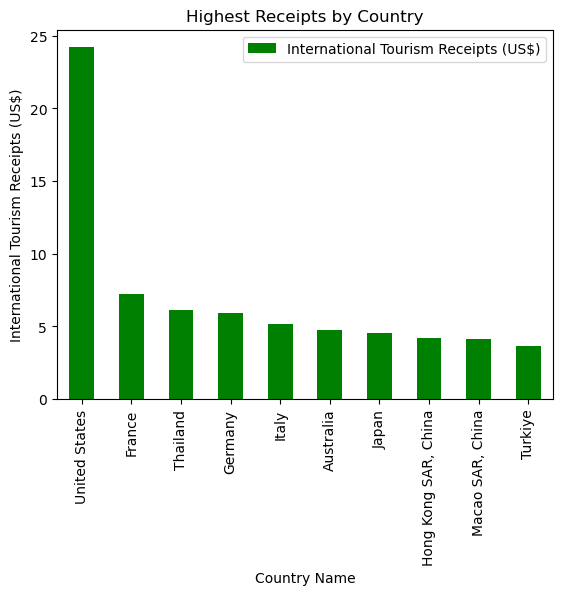

In [72]:
most_rec_df = tourism_df.drop([ "International Tourism Expenditures (US$)"], axis=1)
most_rec_df

plot_pandas = most_rec_df.set_index(['Country Name']).plot.bar(color = 'green')

#Set labels
plt.xlabel('Country Name')
plt.ylabel('International Tourism Receipts (US$)')
plt.title('Highest Receipts by Country')
plt.savefig("../png/2018bar2.png")
plt.show()

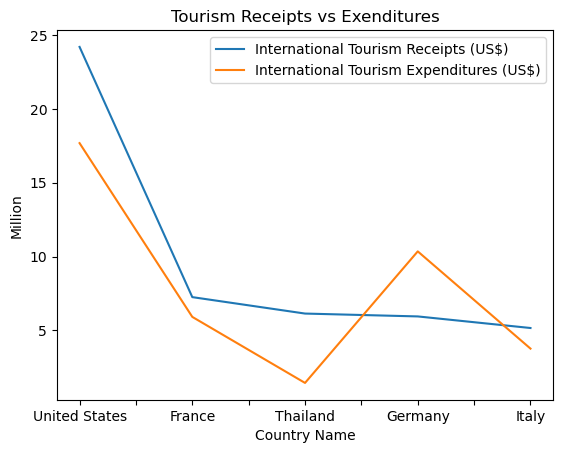

In [73]:
#Reshape the data to fit graph
tourism_shaped_df = tourism_df.head(5)
tourism_shaped_df

#Create a line graph
tourism_shaped_df.set_index(['Country Name']).plot()
plt.title('Tourism Receipts vs Exenditures')
plt.ylabel('Million')
plt.savefig("../png/2018line2.png")


In [74]:
### Question 3 What Countries have the highest GDP? 

In [75]:
# Find the countries with the highest GDP
totalgdp_df = clean_df[['Country Name', 'GDP (US$)', 'Total Population', 'International Tourism Receipts (US$)']]
totalgdp_df

gdp1_df = totalgdp_df.sort_values(["GDP (US$)"], ascending= False)
gdp1_df.head(10)


gdp1_df['GDP (US$)']/=1e12
gdp1_df['Total Population']/=1e8
gdp1_df['International Tourism Receipts (US$)']/=1e10

gdp_df = gdp1_df.head(10)
gdp_df

,Country Name,GDP (US$),Total Population,International Tourism Receipts (US$)
635,United States,20.533057,3.268382,24.1984
303,Japan,5.040881,1.268110,4.5276
240,Germany,3.974443,0.829058,5.9446
223,France,2.790957,0.671583,7.2518
278,India,2.702930,13.690033,2.9143
299,Italy,2.091932,0.604218,5.1602
102,Brazil,1.916934,2.101666,0.6324
318,"Korea, Rep.",1.724846,0.515851,2.3104
501,Russian Federation,1.657329,1.444779,1.8735
37,Australia,1.428267,0.249666,4.7327


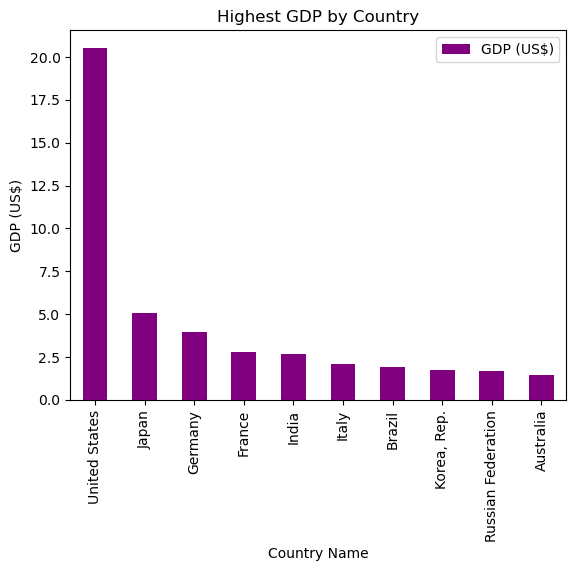

In [76]:
most_gdp_df = gdp_df.drop(["Total Population", "International Tourism Receipts (US$)"], axis=1)
most_gdp_df

plot_pandas = most_gdp_df.set_index(['Country Name']).plot.bar(color = 'purple')

#Set labels
plt.xlabel('Country Name')
plt.ylabel('GDP (US$)')
plt.title('Highest GDP by Country')
plt.savefig("../png/2018bar3.png")
plt.show()

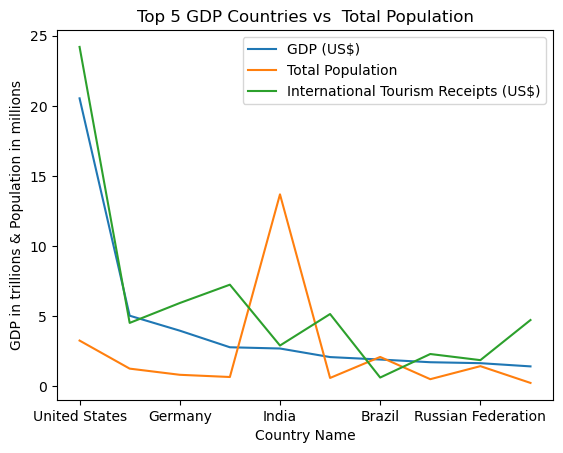

In [77]:
#Compare GDP to total population

gdp_df.set_index(['Country Name']).plot()
plt.title('Top 5 GDP Countries vs  Total Population')
plt.ylabel('GDP in trillions & Population in millions')
plt.savefig("../png/2018line3.png")

In [78]:
### Question 4 What is the correlation?

The r-value is: 0.9187500347419845


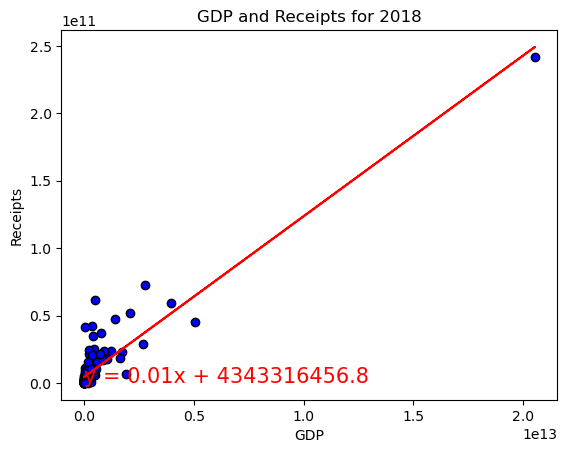

In [79]:
#Compare GDP to Receipts
x = df_filtered["GDP (US$)"]
y = df_filtered["International Tourism Receipts (US$)"]
abelx = "GDP"
abely = "Receipts"
title2 = "GDP and Receipts for 2018"
corfunction(x,y)

The r-value is: 0.7584334928701113


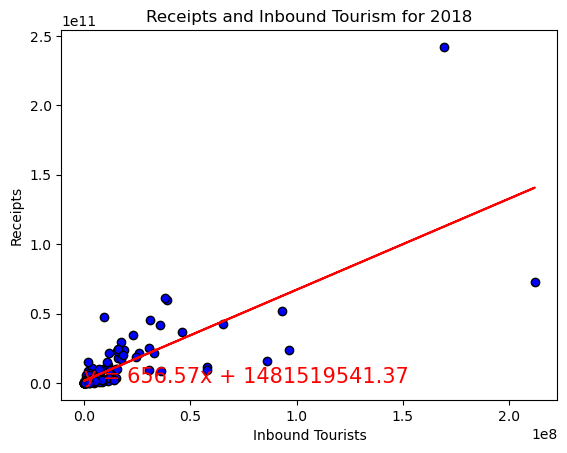

In [80]:
#Compare GDP to Receipts
x = df_filtered["# of arrivals"]
y = df_filtered["International Tourism Receipts (US$)"]
abelx = "Inbound Tourists"
abely = "Receipts"
title2 = "Receipts and Inbound Tourism for 2018"
corfunction(x,y)

The r-value is: 0.7277759086033909


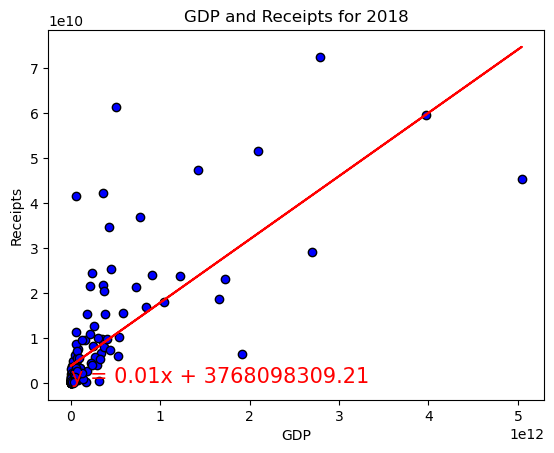

In [81]:
#Remove outliers 
df_filtered = clean_df[clean_df["Country Name"] != "United States"]

x = df_filtered["GDP (US$)"]
y = df_filtered["International Tourism Receipts (US$)"]
abelx = "GDP"
abely = "Receipts"
title2 = "GDP and Receipts for 2018"
corfunction(x,y)
plt.savefig("../png/2018scatter4-1.png")

The r-value is: 0.5109928867141442


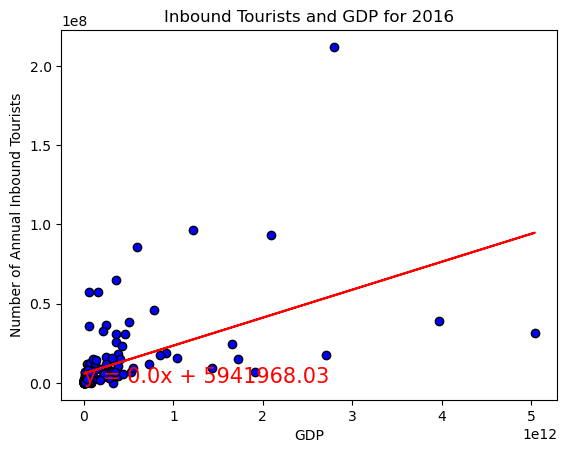

In [82]:
#Compare # of arrivals with GDP
x = df_filtered["GDP (US$)"]
y = df_filtered["# of arrivals"]
abelx = "GDP"
abely = "Number of Annual Inbound Tourists"
title2 = "Inbound Tourists and GDP for 2016"
corfunction(x,y)
plt.savefig("../png/2018scatter4-2.png")